# Практика №4 (додаткова)
## Додаткове завдання по дослідженню даних за допомогою бібліотеки pandas. 

В рамках цього завдання ви будете мати справу з наборами даних, які містять інформацію про пацієнтів із трьох лікарень: загальної ( *general* ), допологової ( *prenatal* ) і спортивної ( *sports* ).

In [25]:
# імпорт необхідних бібліотек
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# встановлення кількісті стовпців, які pandas дозволяє відображати в терміналі
pd.set_option('display.max_columns', 8)

Спочатку необхідно прочитати 3 файли CSV, що містять набори даних.

In [30]:
# зчитати csv файли
file_path_general = r'E:\Programs\Development\PyCharm\MachineLearningCourse\Lab4\general.csv'
file_path_sports = r'E:\Programs\Development\PyCharm\MachineLearningCourse\Lab4\prenatal.csv'
file_path_prenatal = r'E:\Programs\Development\PyCharm\MachineLearningCourse\Lab4\sports.csv'

df_data_general = pd.read_csv(file_path_general)
df_data_sports = pd.read_csv(file_path_sports)
df_data_prenatal = pd.read_csv(file_path_prenatal)

In [31]:
# надрукуйте перші 20 рядків кожного DataFrame (general, prenatal, sports)
print("General DataFrame:")
print(df_data_general.head(20))

print("\nPrenatal DataFrame:")
print(df_data_prenatal.head(20))

print("\nSports DataFrame:")
print(df_data_sports.head(20))

df_columns_general = list(df_data_general.columns)
print("List of label columns:", df_columns_general)
df_columns_prenatal = list(df_data_prenatal.columns)
print("List of label columns:", df_columns_prenatal)
df_columns_sports = list(df_data_sports.columns)
print("List of label columns:", df_columns_sports)

General DataFrame:
    Unnamed: 0 hospital gender  age  ...  mri  xray  children months
0            0  general    man   33  ...  NaN   NaN       NaN    NaN
1            1  general    man   48  ...  NaN   NaN       NaN    NaN
2            2  general  woman   23  ...  NaN   NaN       NaN    NaN
3            3  general    man   27  ...  NaN   NaN       NaN    NaN
4            4  general  woman   22  ...  NaN     f       NaN    NaN
5            5  general    man   46  ...  NaN   NaN       NaN    NaN
6            6  general  woman   68  ...  NaN   NaN       NaN    NaN
7            7  general    man   35  ...  NaN   NaN       NaN    NaN
8            8  general  woman   50  ...  NaN     f       NaN    NaN
9            9  general    man   25  ...  NaN   NaN       NaN    NaN
10          10  general    man   27  ...  NaN   NaN       NaN    NaN
11          11  general    man   57  ...  NaN   NaN       NaN    NaN
12          12  general    man   29  ...  NaN     f       NaN    NaN
13          13 

 З отриманих даних можна переконатися в тому, що воні поділені на три частини, а назви стовпців різні: **HOSPITAL** і **Sex** у пренатальному відділенні ( *prenatal* ), **Hospital** і **Male/female** у спортивному ( *sports* ). Це заважає дослідженню даних і проведенню статистичних розрахунків та візуалізації. Тому необхідно змінити назви стовпців і об’єднаєти отримані набори даних в один.

Щоб об’єднати стовпці, використовуйте функцію **concat** і параметр **ignore_index=True**. Після об’єднання з’явиться бічний стовпець **Unnamed: 0**. Цей стовпець містить індекси таблиць. Цей стовпець не потрібен для практичних цілей, тому видаліть його. 

Кроки виконання:
1. Змініть назви стовпців. Всі назви стовпців у спортивній ( *sports* ) і допологовій ( *prenatal* ) таблицях повинні збігатися з назвами стовпців у загальній таблиці ( *general* ). Зверніть увагу на атрибут **columns**.
2. Об’єднайте DataFrames в один. Використовуйте параметр **ignore_index=True** і наступний порядок: **general**, **prenatal**, **sports**.
3. Видаліть стовпець **Unnamed: 0** (див. функцію **drop**).
4. Надрукуйте 20 випадкових рядків отриманого DataFrame. Для відтворення встановіть random_state=30 (див. [документацію](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)).

In [33]:
# приклад виконання 4-го кроку:
# pandas.DataFrame.sample(n=20, random_state=30)

df_data_prenatal = df_data_prenatal.rename(columns={'HOSPITAL': 'hospital', 'Sex': 'gender'})
df_data_sports = df_data_sports.rename(columns={'Hospital': 'hospital', 'Male/female': 'gender'})
df_combined = pd.concat([df_data_general,
                         df_data_prenatal,
                         df_data_sports],
                        ignore_index=True)
df_combined = df_combined.drop(columns='Unnamed: 0', errors='ignore')
print(df_combined.sample(n=20, random_state=30))

    hospital gender   age  height  ...  Hospital  Male/female  HOSPITAL Sex
928      NaN    NaN  30.0   1.580  ...       NaN          NaN  prenatal NaN
926      NaN    NaN  26.0   1.680  ...       NaN          NaN  prenatal NaN
901      NaN    NaN  42.0   1.630  ...       NaN          NaN  prenatal NaN
87   general    man  54.0   1.720  ...       NaN          NaN       NaN NaN
884      NaN    NaN  35.0   1.580  ...       NaN          NaN  prenatal NaN
297  general    man  56.0   1.480  ...       NaN          NaN       NaN NaN
112  general    man  77.0   1.690  ...       NaN          NaN       NaN NaN
209  general    man  29.0   2.080  ...       NaN          NaN       NaN NaN
419  general    man  53.0   1.700  ...       NaN          NaN       NaN NaN
913      NaN    NaN  15.0   1.690  ...       NaN          NaN  prenatal NaN
820      NaN    NaN  30.0   1.720  ...       NaN          NaN  prenatal NaN
861      NaN    NaN  27.0   1.890  ...       NaN          NaN  prenatal NaN
10   general

Далі необхідно виправити таблицю для подальшого аналізу. Деякі комірки таблиці мають значення **NaN**: стать пацієнта не визначена в пологовому стаціонарі, а стовпці з результатами медичних досліджень мають порожні значення у всіх трьох таблицях. Якщо розглянути стовпець **gender**, то в ньому можна побачити **female**, **male**, **man**, **woman**. Тому потрібно виправити дані в цьому стовпці - значення мають бути **f** або **m**. Замініть значення порожнього стовпця статі **gender** для пренатальних пацієнтів на **f** (можна припустити, що пренатальний лікує лише жінок).

Стовпці **bmi**, **diagnosis**, **blood_test**, **ecg**, **ultrasound**, **mri**, **xray**, **children**, **months** також потрібно виправити. Замініть значення **NaN** у стовпцях вище нулями. 

Кроки виконання:
1. Видалити всі порожні рядки (див. функцію [dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).
2. Виправте всі значення стовпця **gender** на **f** і **m** відповідно (див. функцію [replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)).
3. Замініть значення **NaN** у стовпці **gender** допологового стаціонару ( *prenatal* ) на **f** (див. функцію [fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)).
4. Замініть значення **NaN** у стовпцях **bmi**, **diagnosis**, **blood_test**, **ecg**, **ultrasound**, **mri**, **xray**, **children**, **months** на нулі.
5. Надрукуйте розміри ( *shape* ) отриманого об'єкту DataFrame.
6. Надрукуйте 20 випадкових рядків отриманого DataFrame. Для відтворення встановіть **random_state=30**.



In [34]:
# виправлення даних у таблиці
df_combined = df_combined.dropna(how='all')
gender_mapping = {'female': 'f', 'woman': 'f', 'male': 'm', 'man': 'm'}
df_combined = df_combined.replace(gender_mapping)
df_combined.loc[df_combined['hospital'] == 'prenatal', 'gender'] = df_combined.loc[df_combined['hospital'] == 'prenatal', 'gender'].fillna('f')
columns_to_replace = ['bmi', 'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray', 'children', 'months']
df_combined[columns_to_replace] = df_combined[columns_to_replace].fillna(0)
print("Dimensions of the received DataFrame object: ",
      pd.concat([df_data_general,
                 df_data_prenatal,
                 df_data_sports],
                ignore_index=True).shape)
print()
print(df_combined.sample(n=20, random_state=30))

Dimensions of the received DataFrame object:  (1006, 19)

    hospital gender   age  height  ...  Hospital  Male/female  HOSPITAL Sex
929      NaN    NaN  32.0   1.860  ...       NaN          NaN  prenatal NaN
927      NaN    NaN  29.0   1.520  ...       NaN          NaN  prenatal NaN
517      NaN    NaN  18.0   5.931  ...    sports            f       NaN NaN
87   general      m  54.0   1.720  ...       NaN          NaN       NaN NaN
884      NaN    NaN  35.0   1.580  ...       NaN          NaN  prenatal NaN
463      NaN    NaN  16.0   6.960  ...    sports            m       NaN NaN
112  general      m  77.0   1.690  ...       NaN          NaN       NaN NaN
297  general      m  56.0   1.480  ...       NaN          NaN       NaN NaN
417  general      f  26.0   1.650  ...       NaN          NaN       NaN NaN
661      NaN    NaN  18.0   6.986  ...    sports            m       NaN NaN
344  general      f  60.0   1.410  ...       NaN          NaN       NaN NaN
834      NaN    NaN  54.0   1.

Після виправлення даних можна отримати основні статистичні характеристики, розподіл даних, тощо. 

Надайте відповіді на наступні питання:
1. Яка лікарня ( *hospital* ) має найбільшу кількість пацієнтів? (див. функції [groupby, count](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.count.html), [idxmax](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html))
2. Яка частка пацієнтів загальної ( *general* ) лікарні страждає на проблеми зі шлунком (стовпець *stomach* )? Округліть результат до третього знака після коми. (зверніть увагу на стовпці *diagnosis*, *stomach*, див. на функцію [value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html))
3. Яка різниця в медіанному віці (необхідно знайти значення медіани) пацієнтів загальної ( *general* ) та спортивної ( *sports* ) лікарень? (див. функцію [median()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html))


In [35]:
# ваш код
hospital_patient_counts = df_combined.groupby('hospital')['gender'].count()
most_patients_hospital = hospital_patient_counts.idxmax()
print(f"The hospital with the largest number of patients: {most_patients_hospital}")

general_stomach_patients = df_combined[(df_combined['hospital'] == 'general') & (df_combined['diagnosis'] == 'stomach')]
fraction_stomach_patients = len(general_stomach_patients) / len(df_combined[df_combined['hospital'] == 'general'])
fraction_stomach_patients_rounded = round(fraction_stomach_patients, 3)
print(f"Share of general hospital patients with stomach problems: {fraction_stomach_patients_rounded}")

general_age = df_combined[df_combined['hospital'] == 'general']['age']
sports_age = df_combined[df_combined['hospital'] == 'sports']['age']
median_general_age = general_age.median()
median_sports_age = sports_age.median()
age_difference = median_general_age - median_sports_age
print(f"Difference in median age between patients of general and sports hospitals: {age_difference}")

The hospital with the largest number of patients: general
Share of general hospital patients with stomach problems: 0.325
Difference in median age between patients of general and sports hospitals: nan


В кінці необхідно створити візуалізацію даних.
Отже, покажіть який вік пацієнтів найчастіше серед усіх лікарень? Побудуйте гістограму та виберіть один із таких вікових діапазонів: 0-15, 15-35, 35-55, 55-70 або 70-80.

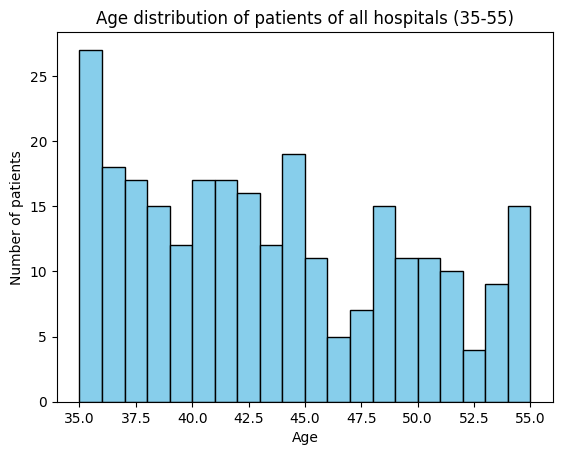

In [38]:
age_range = (35, 55)
filtered_age_data = df_combined[(df_combined['age'] >= age_range[0]) & (df_combined['age'] <= age_range[1])]
plt.hist(filtered_age_data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age distribution of patients of all hospitals (35-55)')
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.show()